In [1]:
%matplotlib notebook
import pandas as pd
import sys
import plot_util
import pprint
import json
import os
from pathlib import Path
import util
from importlib import reload
import pickle

pp = pprint.PrettyPrinter(indent=4)
myprint = pp.pprint

/data/madhu/dataset-analysis-new/dataset-analysis-new/code/seaborn_plot_util.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [5]:
saves_dir = os.path.join("../../saves", "negation_dep_parsing")
Path(saves_dir).mkdir(parents=True, exist_ok=True) 
datasets = json.loads(open("../../input.json").read())
preload_flag = True
plot_save_prefix = "pos_neg_negation_depparsing"
analysis_types = [
    "word_level", 
    "sent_level", 
    "review_level"
]
datasets_to_be_not_considered = []
colors_four_subbars = [('#377eb8'), ('#ff7f00')]*2

'word_level'



Saving the plot in  ../saves/negation_dep_parsing/pos_neg_negation/pos_neg_negation_depparsing_word_level_non_amz


<IPython.core.display.Javascript object>


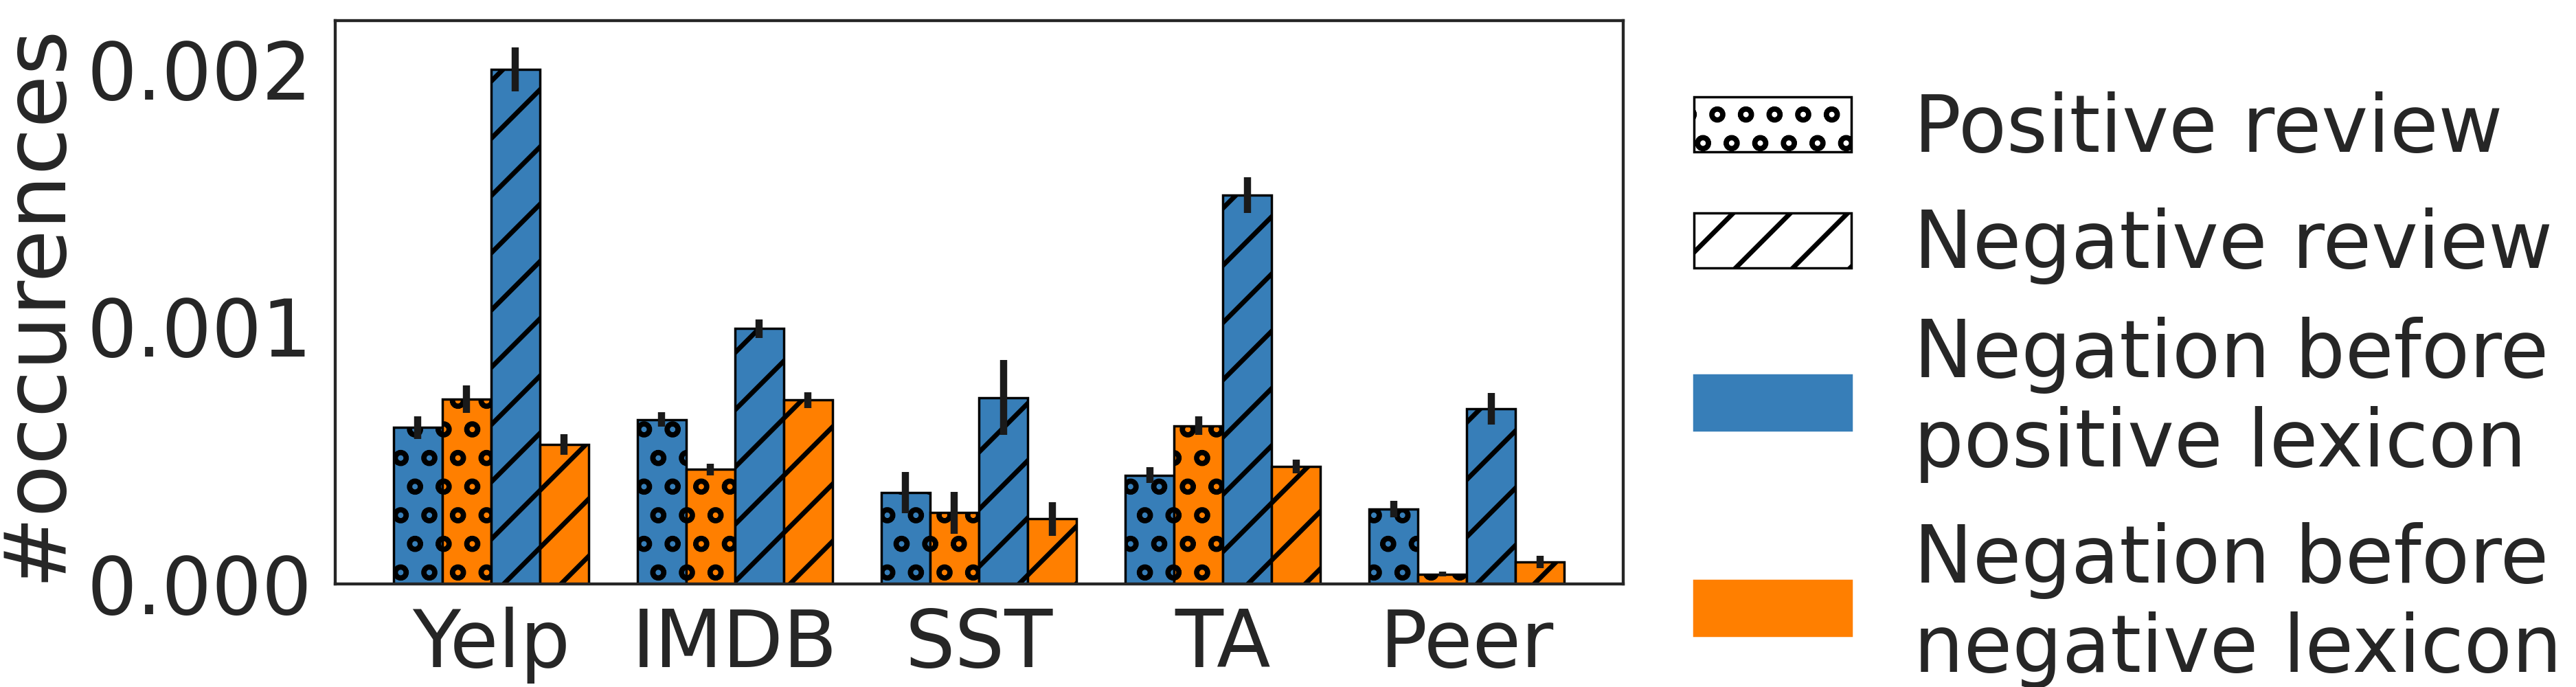




Saving the plot in  ../saves/negation_dep_parsing/pos_neg_negation/pos_neg_negation_depparsing_word_level_amz


<IPython.core.display.Javascript object>


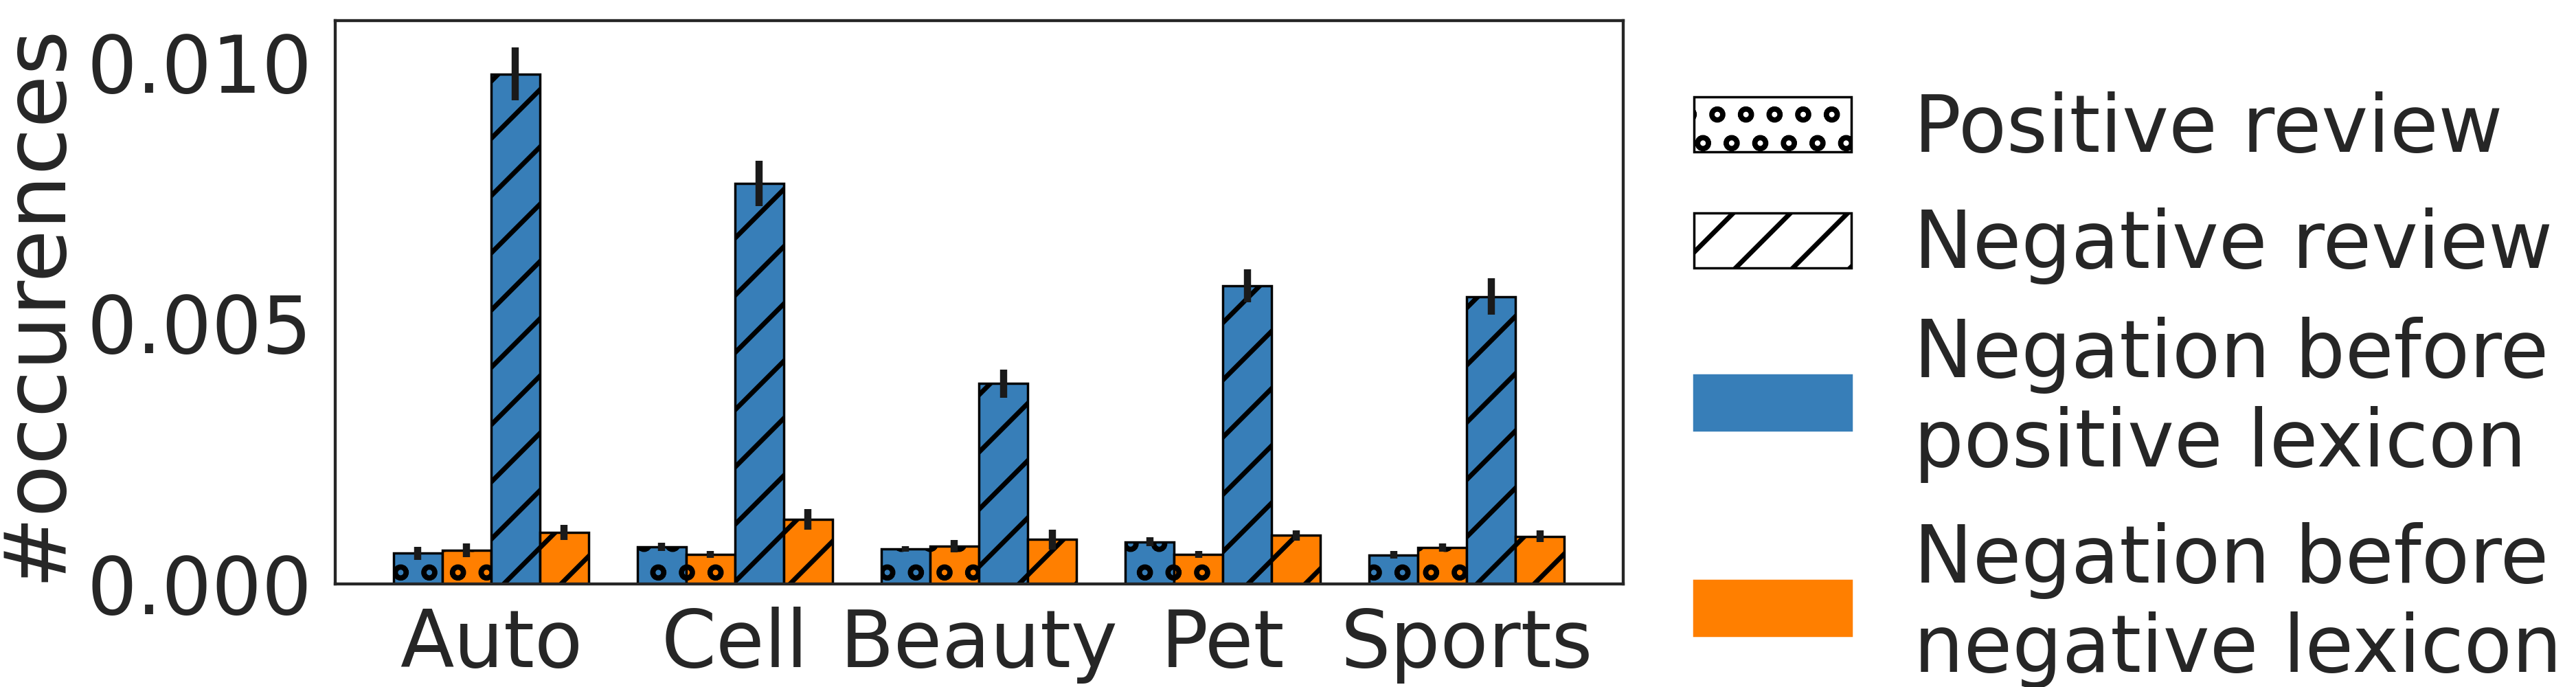

Saving the plot in  ../saves/negation_dep_parsing/overall/overall_negation_depparsing_word_level_amz


<IPython.core.display.Javascript object>


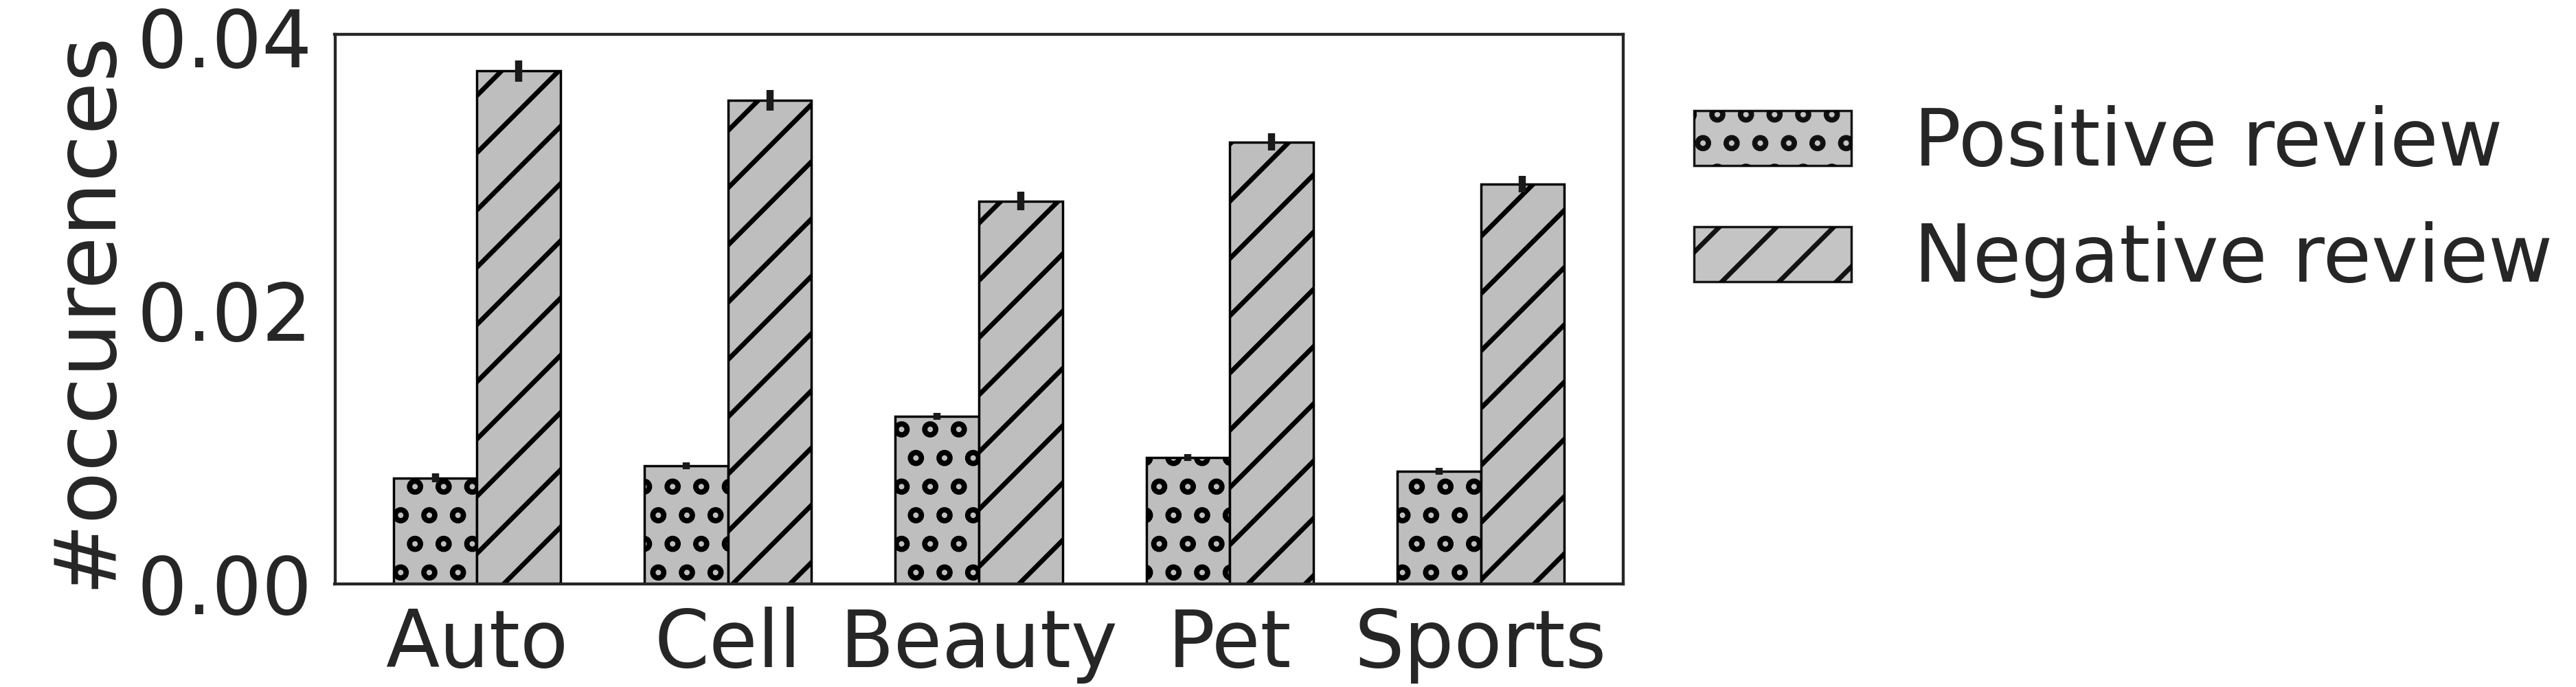

Saving the plot in  ../saves/negation_dep_parsing/overall/overall_negation_depparsing_word_level_non_amz


<IPython.core.display.Javascript object>


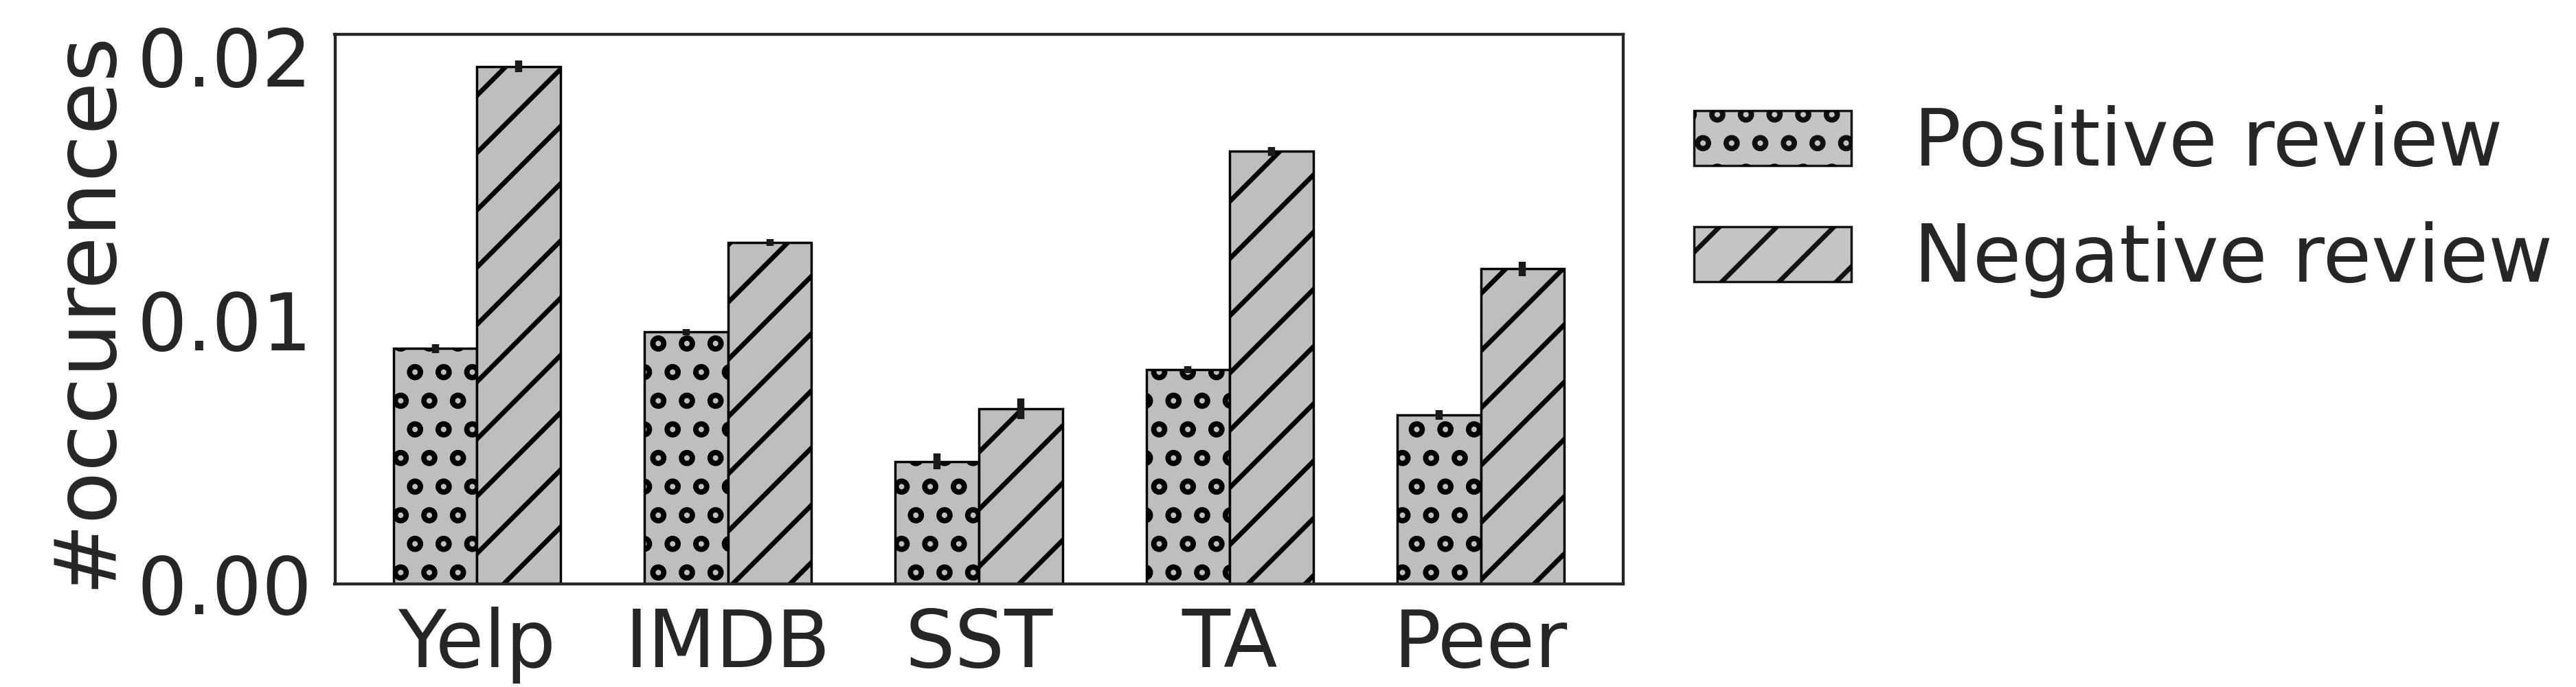

'sent_level'



Saving the plot in  ../saves/negation_dep_parsing/pos_neg_negation/pos_neg_negation_depparsing_sent_level_non_amz


<IPython.core.display.Javascript object>


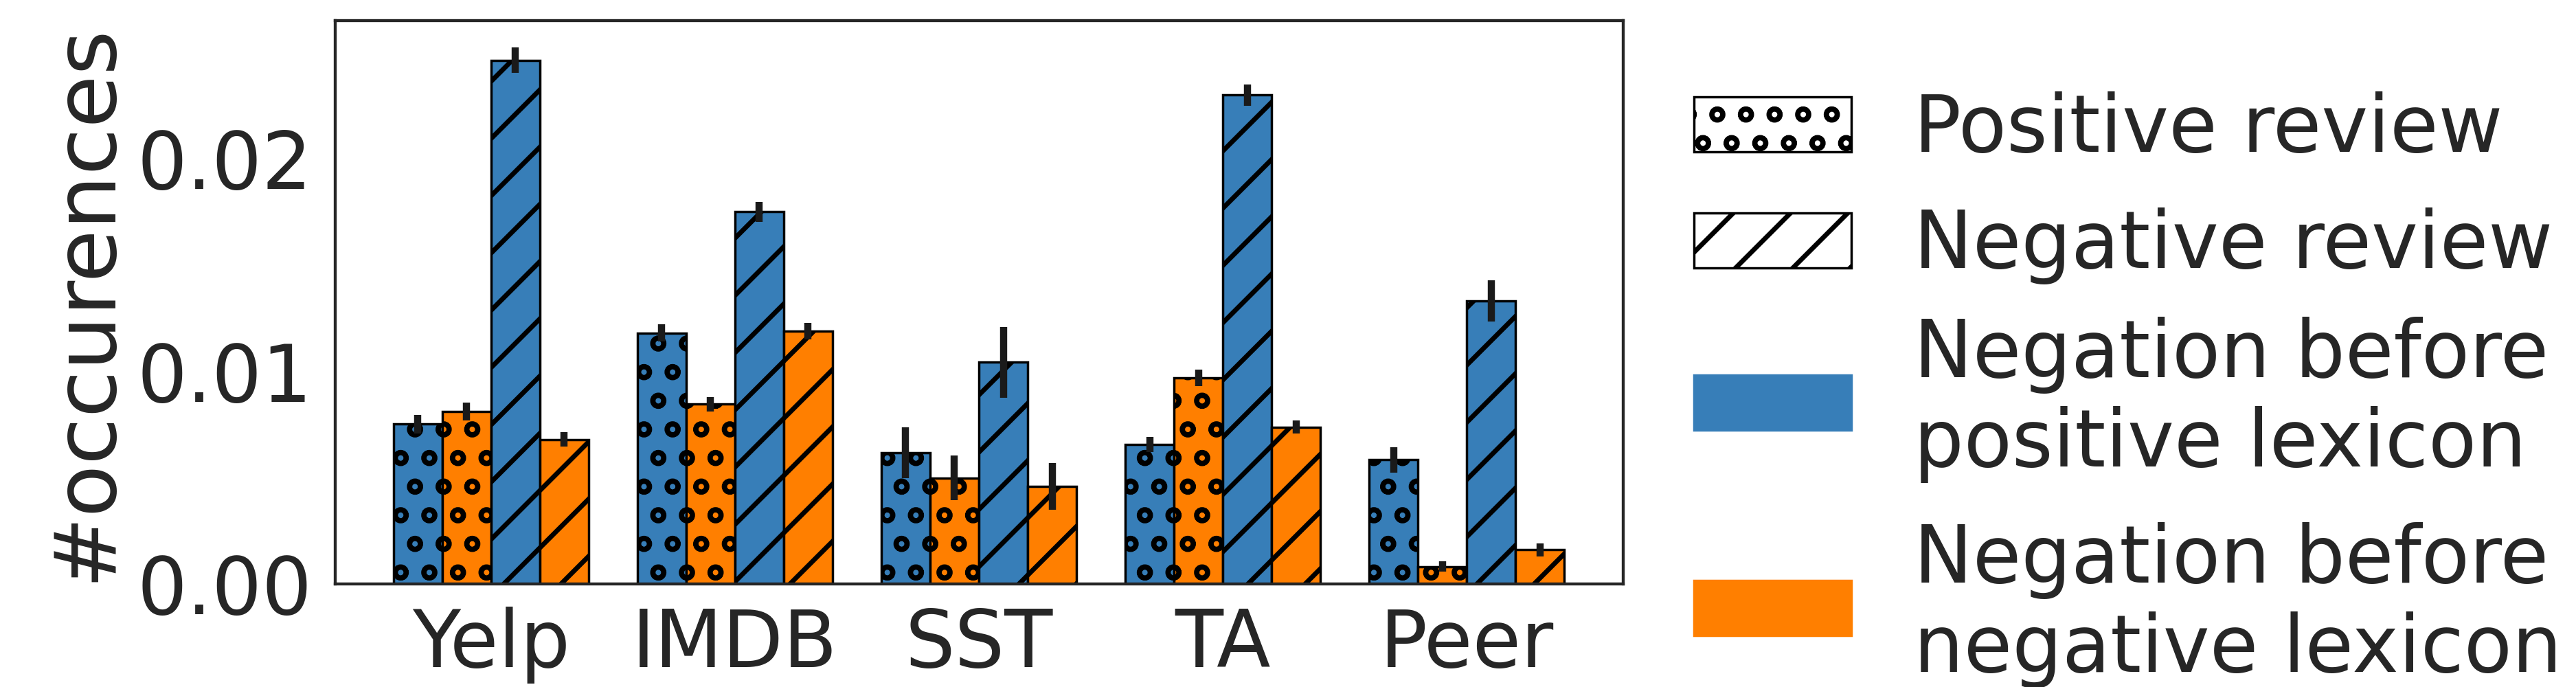




Saving the plot in  ../saves/negation_dep_parsing/pos_neg_negation/pos_neg_negation_depparsing_sent_level_amz


<IPython.core.display.Javascript object>


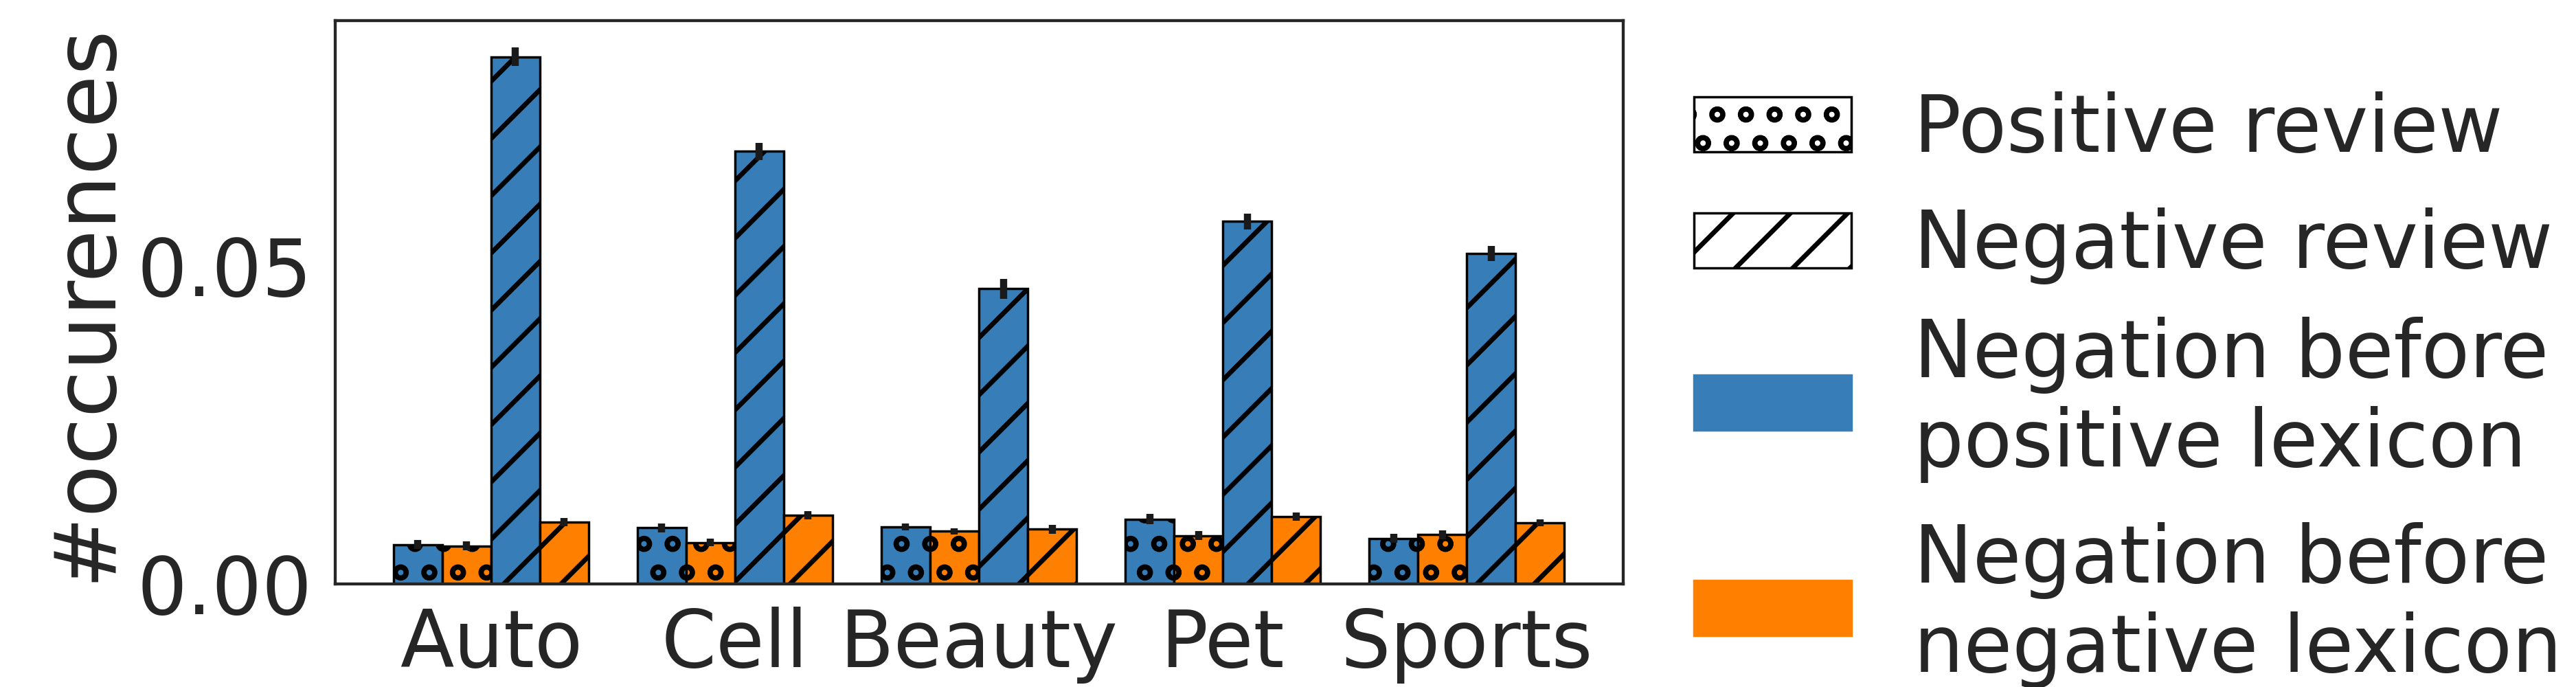

Saving the plot in  ../saves/negation_dep_parsing/overall/overall_negation_depparsing_sent_level_amz


<IPython.core.display.Javascript object>


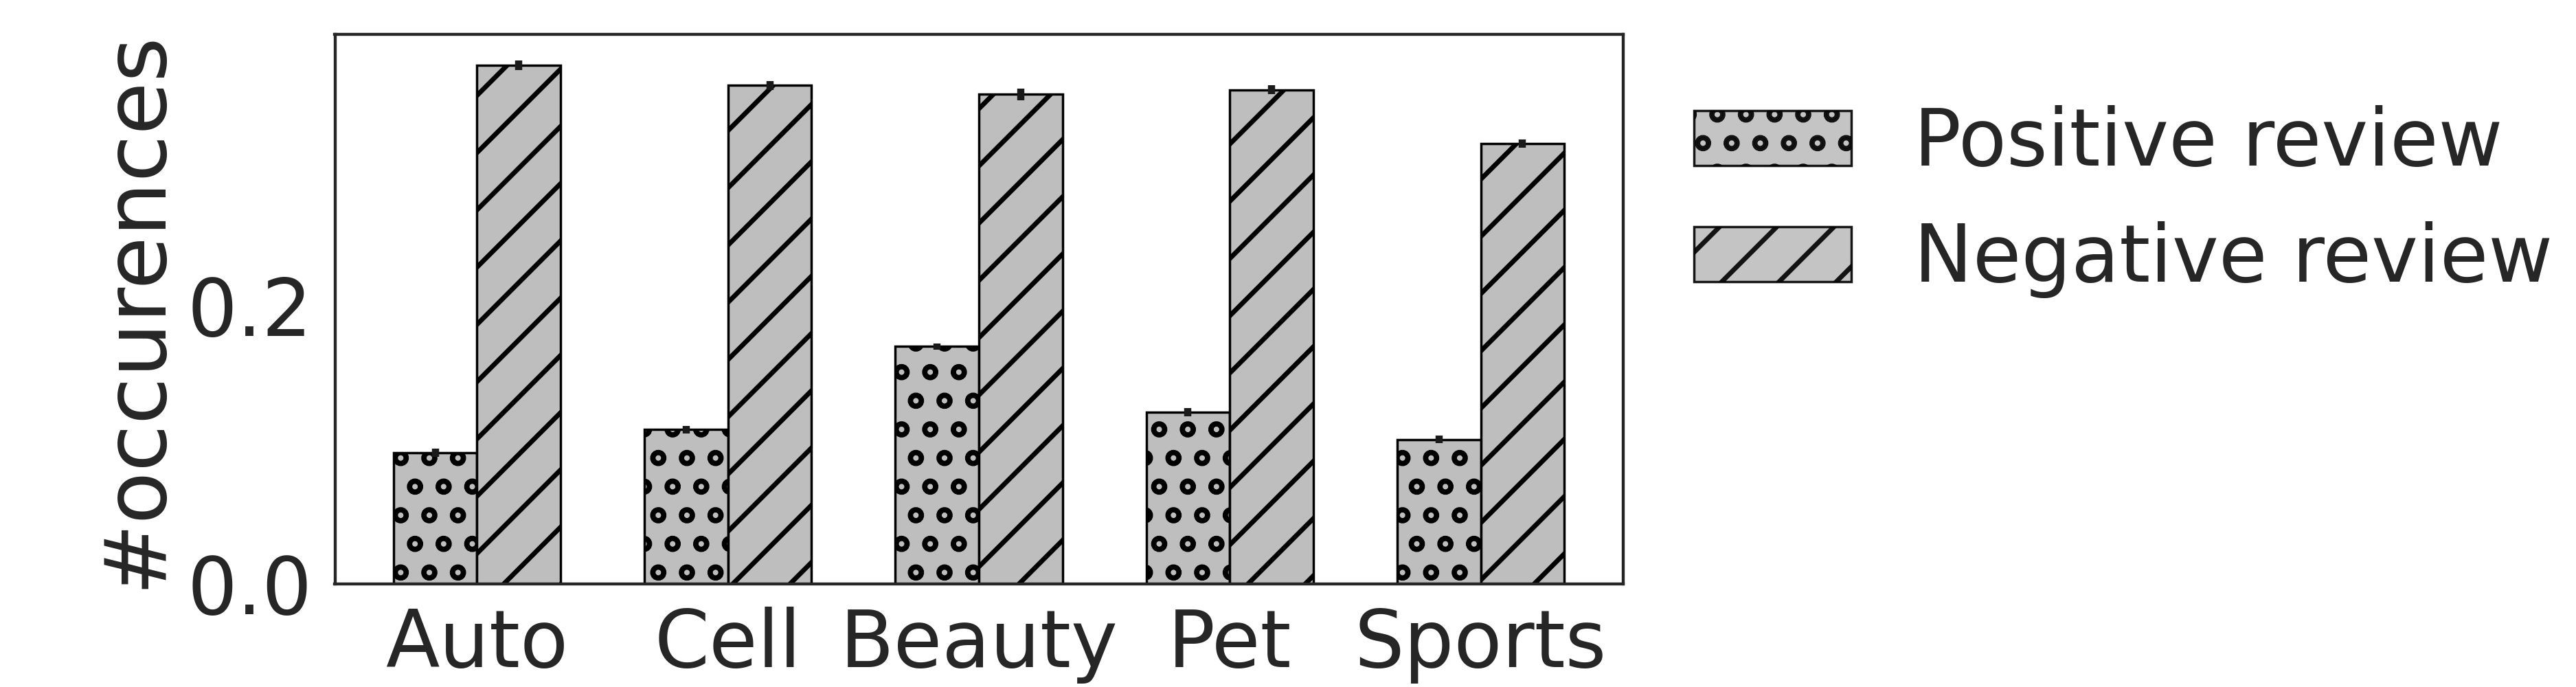

Saving the plot in  ../saves/negation_dep_parsing/overall/overall_negation_depparsing_sent_level_non_amz


<IPython.core.display.Javascript object>


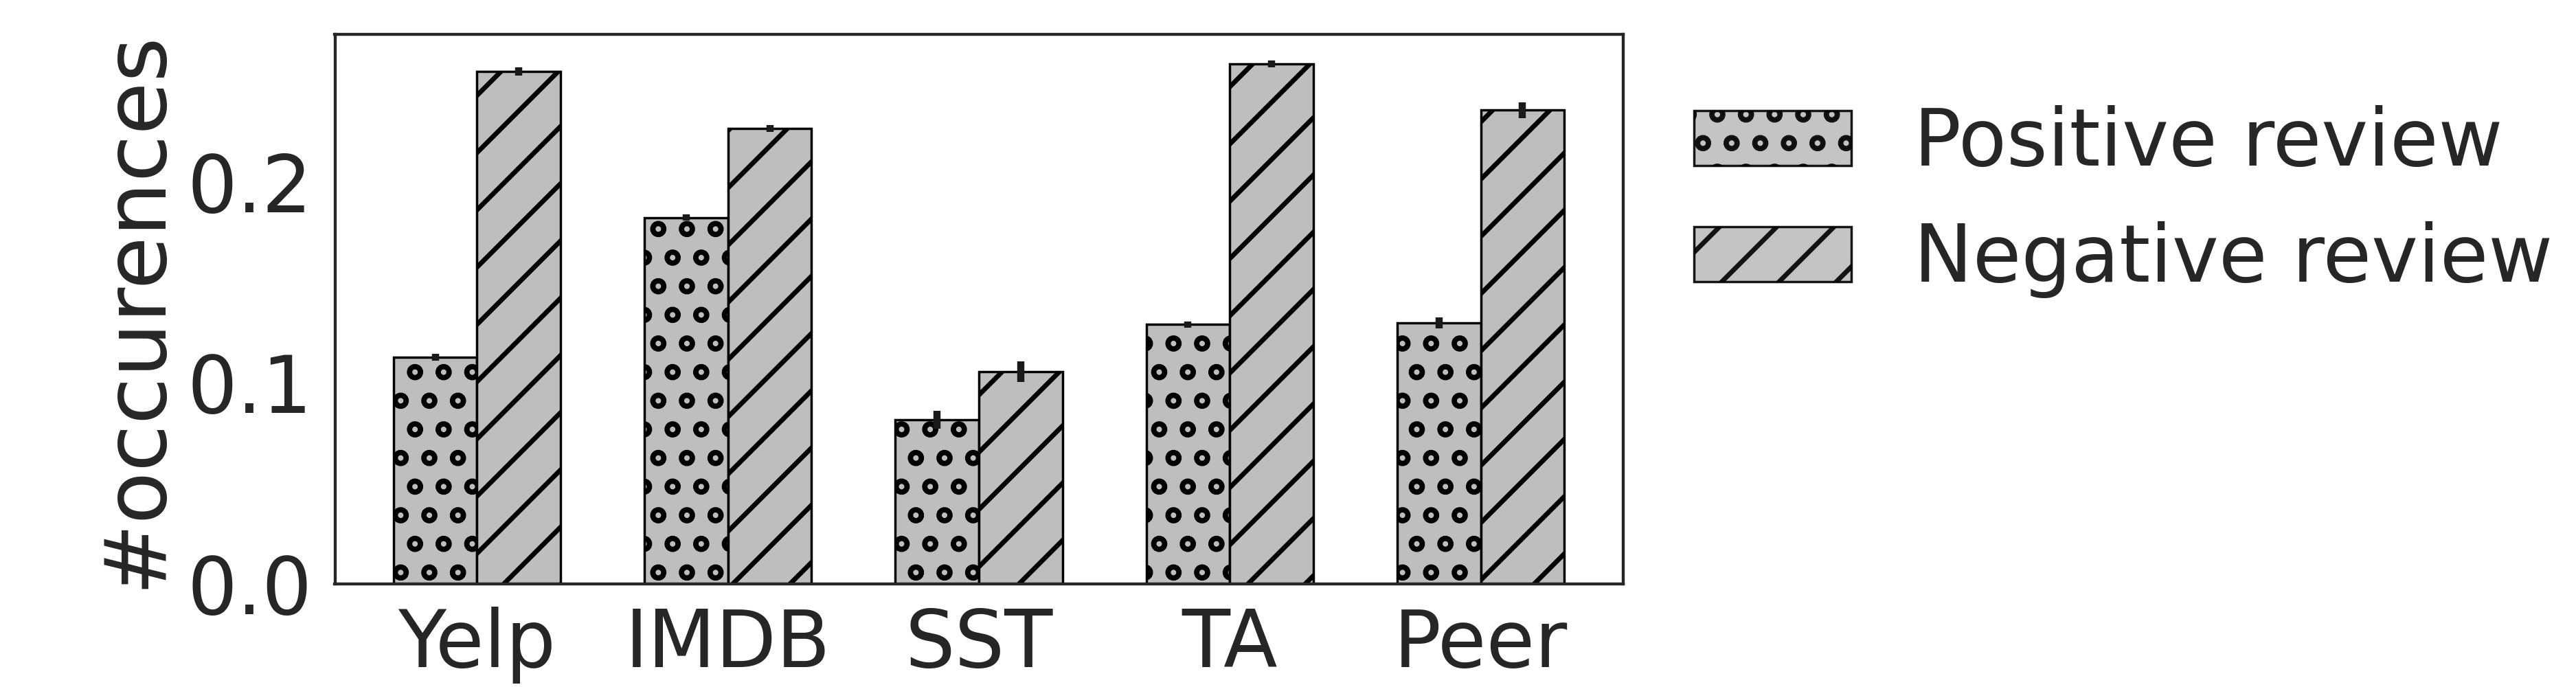

'review_level'



Saving the plot in  ../saves/negation_dep_parsing/pos_neg_negation/pos_neg_negation_depparsing_review_level_non_amz


<IPython.core.display.Javascript object>


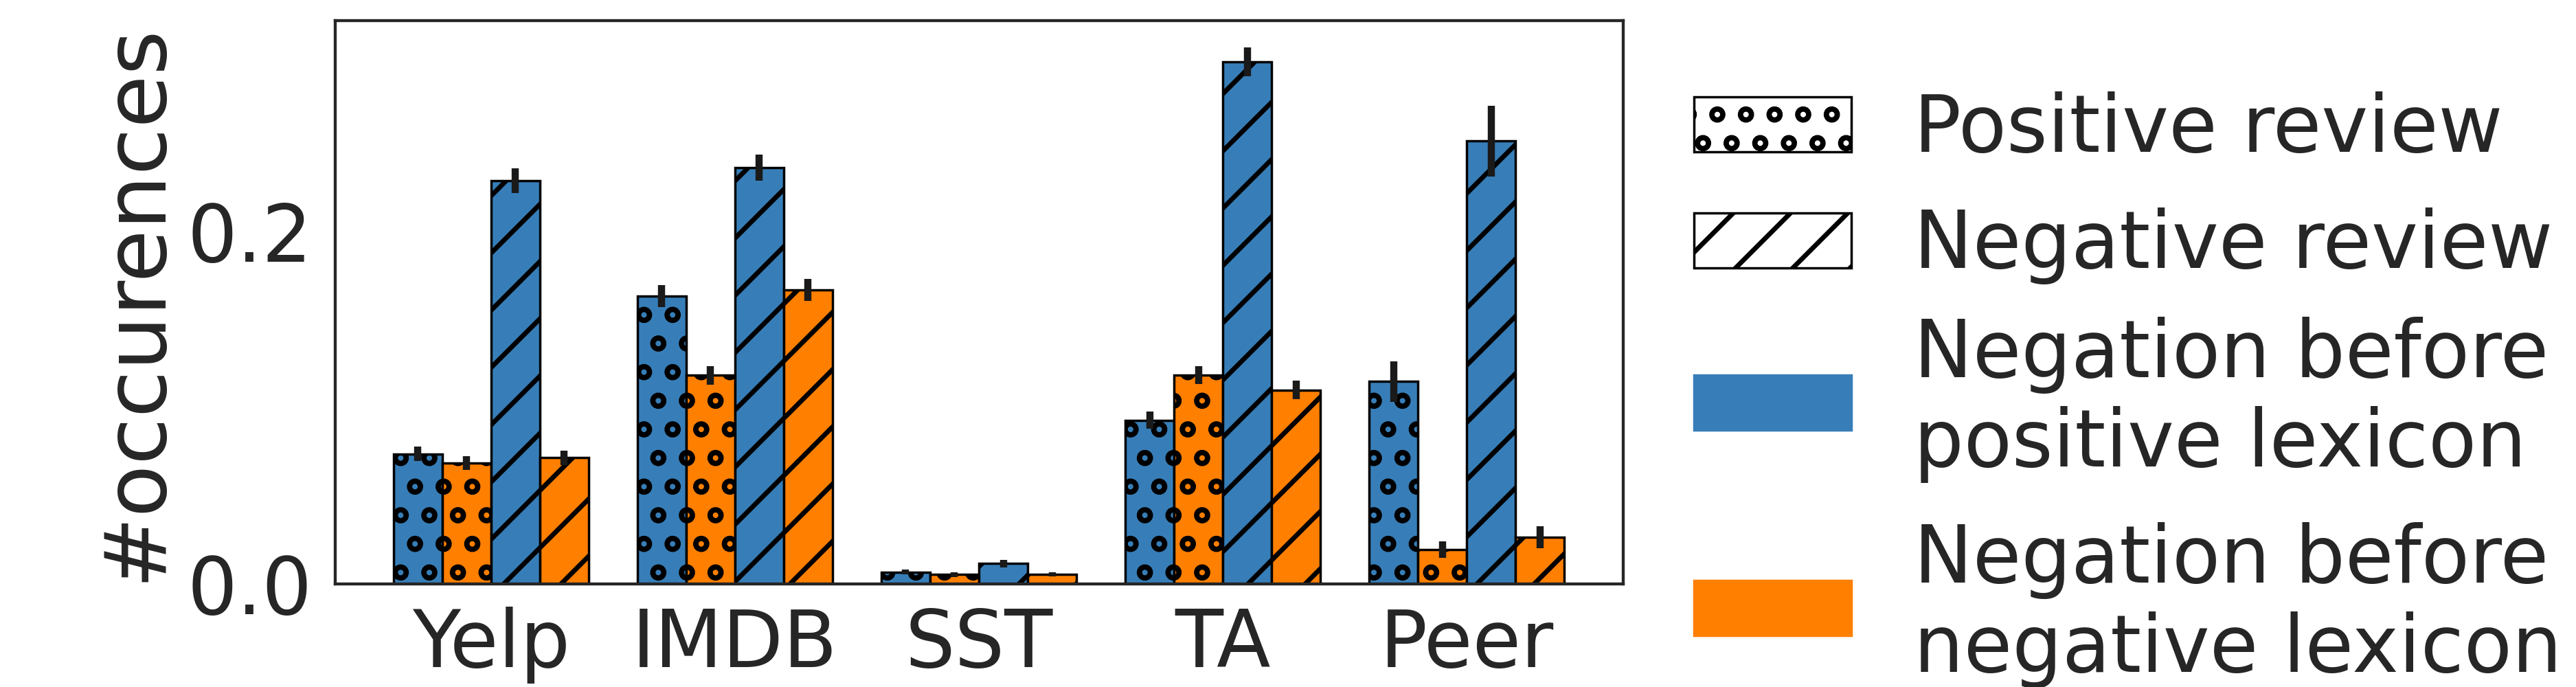




Saving the plot in  ../saves/negation_dep_parsing/pos_neg_negation/pos_neg_negation_depparsing_review_level_amz


<IPython.core.display.Javascript object>


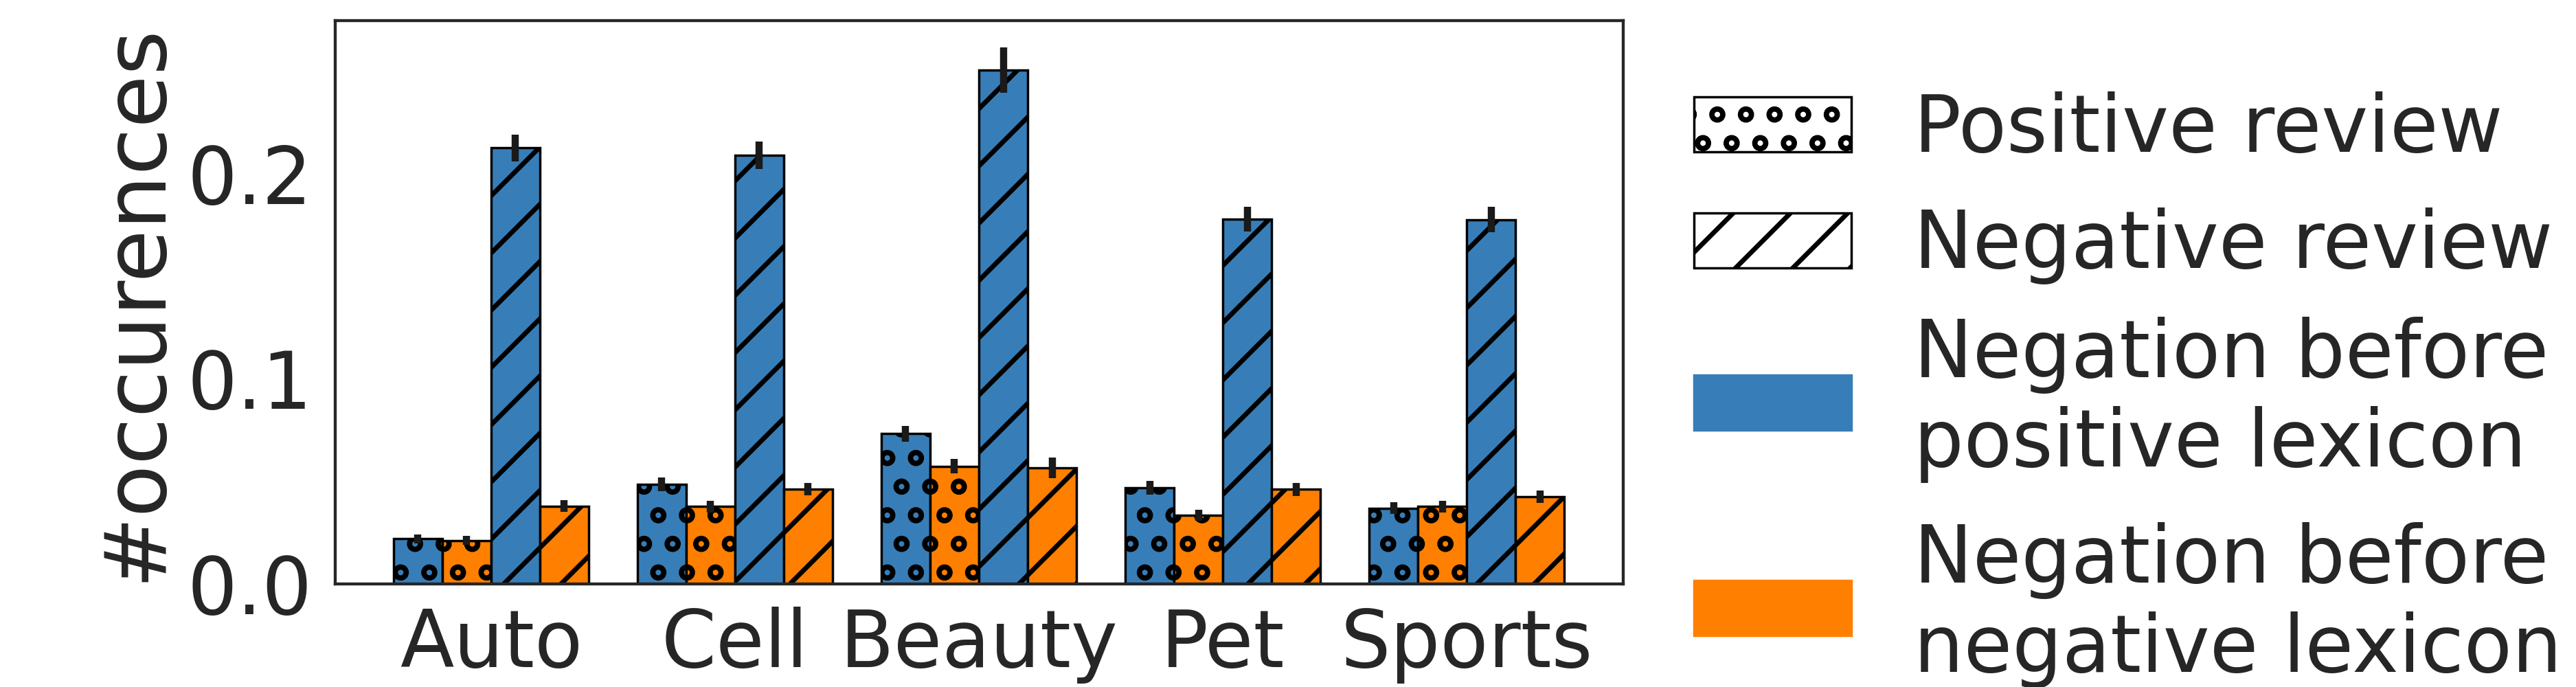

Saving the plot in  ../saves/negation_dep_parsing/overall/overall_negation_depparsing_review_level_amz


<IPython.core.display.Javascript object>


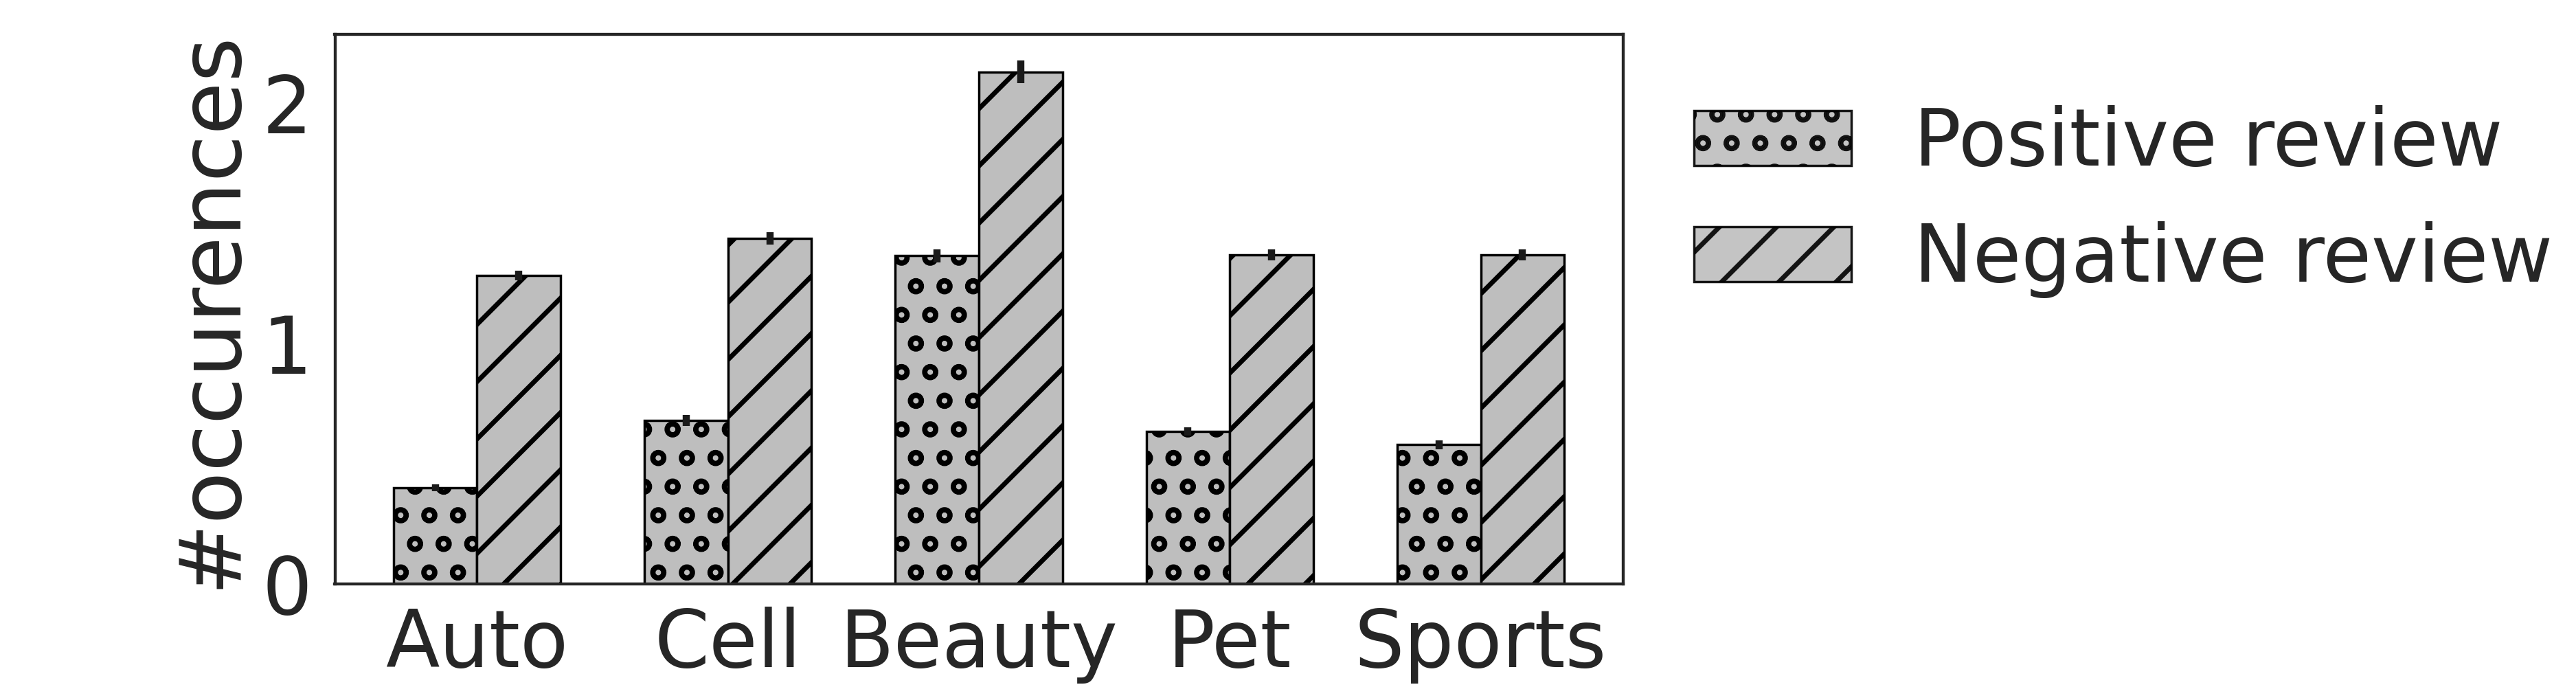

Saving the plot in  ../saves/negation_dep_parsing/overall/overall_negation_depparsing_review_level_non_amz


<IPython.core.display.Javascript object>


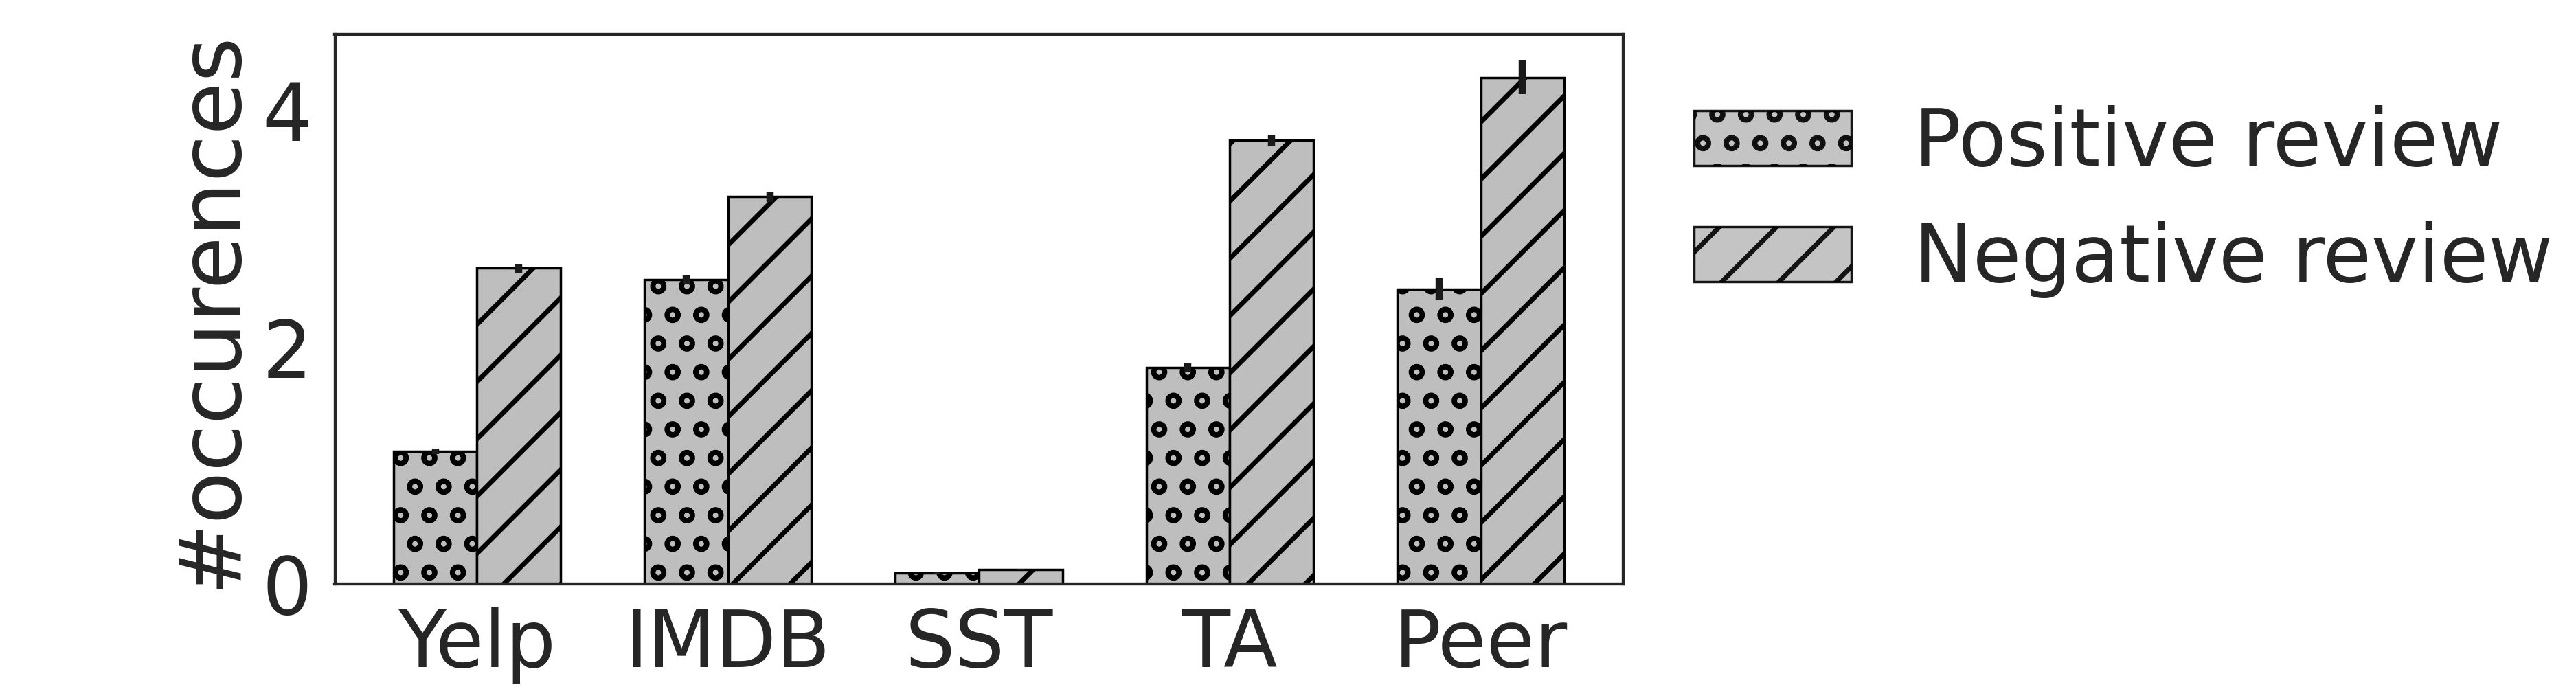

In [6]:
color_two_subbars = ["#BEBEBE"]*4

reload(plot_util)
for analysis in analysis_types: 
    plot_data = pickle.load(open(os.path.join(saves_dir, "pos_neg_negation", analysis+"_"+plot_save_prefix+".pickle"), "rb"))
    plot_data_overall_negation = pickle.load(open(os.path.join(saves_dir, "overall", analysis+"_"+"overall_negation_depparsing.pickle"), "rb"))
    myprint(analysis)
    
    amazon_data, non_amazon_data = plot_util.filter_plot_data(plot_data)
    plot_util.draw_grouped_bargraph_four_subbars(non_amazon_data, "name", "value", 
        "review category", "text sentiment", 
        os.path.join(saves_dir, "pos_neg_negation", plot_save_prefix+"_"+analysis+"_non_amz"),
        figsize=(15, 4), 
        position=(0.13, 0.15, 0.5, 0.82),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5),
        y_axis_name="#occurences",
        negation=True, colors=colors_four_subbars)    
    plot_util.draw_grouped_bargraph_four_subbars(amazon_data, "name", "value", 
        "review category", "text sentiment",
        os.path.join(saves_dir, "pos_neg_negation", plot_save_prefix+"_"+str(analysis)+"_amz"),
        figsize=(15, 4), 
        position=(0.13, 0.15, 0.5, 0.82),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5),
        amazon_data_flag=True,
        y_axis_name="#occurences",
        negation=True, colors=colors_four_subbars)
    
    amazon_data, non_amazon_data = plot_util.filter_plot_data(plot_data_overall_negation)
    plot_util.draw_grouped_bargraph_two_subbars(amazon_data, "name", "value", 
        "category", 
        os.path.join(saves_dir, "overall", "overall_negation_depparsing_"+analysis+"_amz"),
        figsize=(15, 4), 
        position=(0.13, 0.15, 0.5, 0.8),
        y_axis_name="#occurences",
        bbox_to_anchor=(1, 0.5, 0.2, 0.5), 
        amazon_data_flag=True, colors=color_two_subbars)
    plot_util.draw_grouped_bargraph_two_subbars(non_amazon_data, "name", "value", 
        "category", 
        os.path.join(saves_dir, "overall", "overall_negation_depparsing_"+analysis+"_non_amz"),
        figsize=(15, 4), 
        y_axis_name="#occurences",
        position=(0.13, 0.15, 0.5, 0.8),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5), 
        amazon_data_flag=False, colors=color_two_subbars)